In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
## Read coref_speed.csv
coref_speed_dets = pd.read_csv('coref_speed.csv')
coref_speed_dets = coref_speed_dets.drop(columns=['Unnamed: 0'])
met_speed_dets = pd.read_csv('met_speed.csv')
met_speed_dets = met_speed_dets.drop(columns=['Unnamed: 0'])
met_speed_dets

,doc_key,num_mentions,link_time,dataset,num_mentions_bins
0,6593_history_of_tom_jones_a_foundling_brat_0,219,0.005225,litbank,"(100, 500]"
1,271_black_beauty_brat_0,350,0.008214,litbank,"(100, 500]"
2,730_oliver_twist_brat_0,226,0.006007,litbank,"(100, 500]"
3,16357_mary_a_fiction_brat_0,278,0.004606,litbank,"(100, 500]"
4,2807_to_have_and_to_hold_brat_0,316,0.003922,litbank,"(100, 500]"
5,1023_bleak_house_brat_0,256,0.003190,litbank,"(100, 500]"
6,1155_the_secret_adversary_brat_0,290,0.004685,litbank,"(100, 500]"
7,238_dear_enemy_brat_0,328,0.005455,litbank,"(100, 500]"
8,1661_the_adventures_of_sherlock_holmes_brat_0,287,0.004613,litbank,"(100, 500]"
9,711_allan_quatermain_brat_0,282,0.004798,litbank,"(100, 500]"


[0.004911560761301106, 0.014088153839111278, 0.0008281866709390666, 0.0378309885660807]


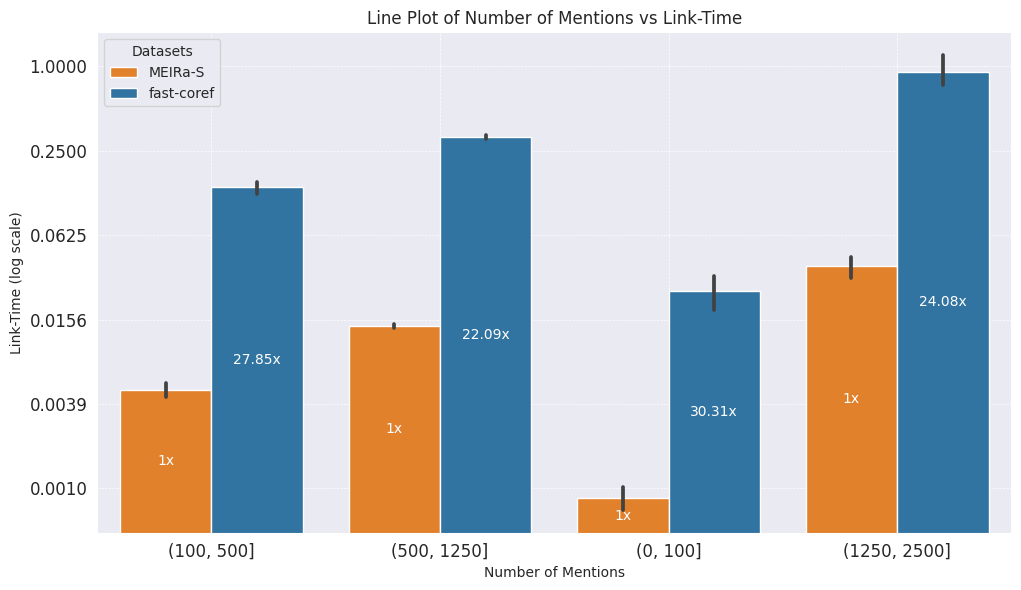

In [9]:
## Merge speed_dets_coref_df and speed_dets_met_df and create "method" column
coref_speed_dets['method'] = 'fast-coref'
met_speed_dets['method'] = 'MEIRa-S'
## Merge
speed_dets = pd.concat([coref_speed_dets,met_speed_dets])

plt.figure(figsize=(10, 6))

# Define the order of categories
hue_order = ['MEIRa-S', 'fast-coref']
palette = [sns.palettes.color_palette()[1],sns.palettes.color_palette()[0]]

# Beautify the plot
sns.set_style('darkgrid')

barplot = sns.barplot(data=speed_dets, x='num_mentions_bins', y='link_time', hue='method',hue_order=hue_order,palette=palette)

# Annotate the bars inside the bar
prev_bar_heights = None
for container_ind,container in enumerate(barplot.containers):
    if container_ind % 2 == 0:
        barplot.bar_label(container, labels=[f'1x' for v in container], label_type='center', color='white', fontsize=10)
        prev_bar_heights = [v.get_height() for v in container]
    else:
        print(prev_bar_heights)
        # barplot.bar_label(container, labels=[f'{v.get_height():.2f}x' for v in container], label_type='center', color='white', fontsize=10)
        barplot.bar_label(container, labels=[f'{v.get_height()/prev_bar_heights[v_ind]:.2f}x' for v_ind,v in enumerate(container)], label_type='center', color='white', fontsize=10)

# Add labels and title
plt.xlabel('Number of Mentions')
plt.ylabel('Link-Time (log scale)')
plt.title('Line Plot of Number of Mentions vs Link-Time')
plt.legend(title='Datasets')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Apply logarithmic scale to y-axis
plt.yscale('log',base=2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))

# Show the plot
plt.show()